In [2]:
import warnings

In [3]:
!pip install lightgbm

In [4]:
!pip install lazypredict

In [7]:
import numpy as np
import pandas as pd

In [6]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor

In [4]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from tqdm import tqdm

In [3]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [10]:
# Open a file contaning Smiles

data = pd.read_csv("Aqueous solubility_9945.csv")

In [104]:
data.head(50)

,Compound ID,InChIKey,SMILES,logS,logP,MW
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.22,17.85,863.34
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.47,14.23,641.07
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.26,11.82,566.94
3,C1714,BDIWFCKBPZPBQT-UHFFFAOYSA-N,CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC,-15.68,10.41,612.15
4,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.21,12.08,546.85
5,C1716,FTQWRYSLUYAIRQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)NCNC(=O)CCCCCCCCCCCCCCCCC,-14.94,12.48,579.00
6,C1717,YYGNTYWPHWGJRM-AAJYLUCBSA-N,C/C(=C\CC/C=C(/CC/C=C(/CCC=C(C)C)\C)\C)/CC/C=C...,-14.59,10.61,410.72
7,C1718,RYROWNOHCUSOKT-UHFFFAOYSA-N,Brc1ccc(nc1)OCCCCCCCCCCNCCSSCCNCCCCCCCCCCOc1cc...,-14.55,12.65,849.69
8,C1719,SPJCRMJCFSJKDE-ZWBUGVOYSA-N,ClCCN(c1ccc(cc1)CC(=O)O[C@H]1CC[C@]2(C(=CC[C@@...,-14.52,10.47,644.80
9,C1720,MSCCTZZBYHQMQJ-AZAGJHQNSA-N,C[C@@H](CCC[C@]1(C)CCc2c(O1)c(C)c(c(c2C)OC(=O)...,-13.80,9.75,535.80


In [12]:
data.tail()

,Compound ID,InChIKey,SMILES,logS,logP,MW
9951,NaN,NaN,NaN,NaN,NaN,NaN
9952,NaN,NaN,NaN,NaN,NaN,NaN
9953,NaN,NaN,NaN,NaN,NaN,NaN
9954,NaN,NaN,NaN,NaN,NaN,NaN
9955,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.shape

(9956, 6)

In [14]:
# Null vaules for Smiles
data.SMILES.isnull().sum()

13

In [15]:
#remove Null Vaules
data.dropna(inplace=True)

In [16]:
data.shape

(9943, 6)

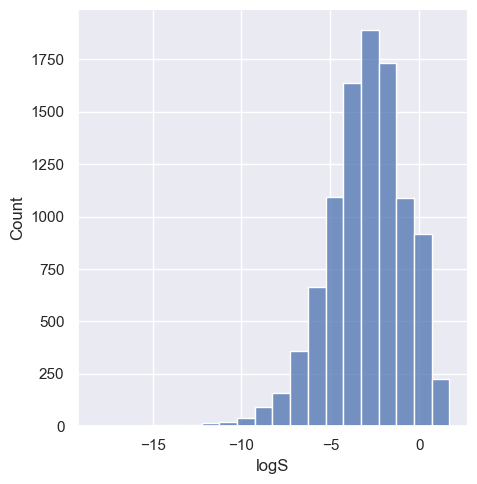

In [17]:
# Remove Outliers, which can not useful in ML
# Generate Histogram for LogS vaules distribution
sn.set_theme()
sn.displot(data=data, x="logS", binwidth=1)

<Axes: xlabel='logS'>

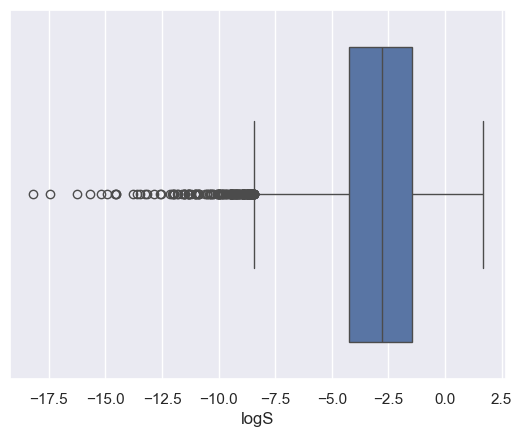

In [19]:
#Boxplot
sn.boxplot(data=data, x='logS')

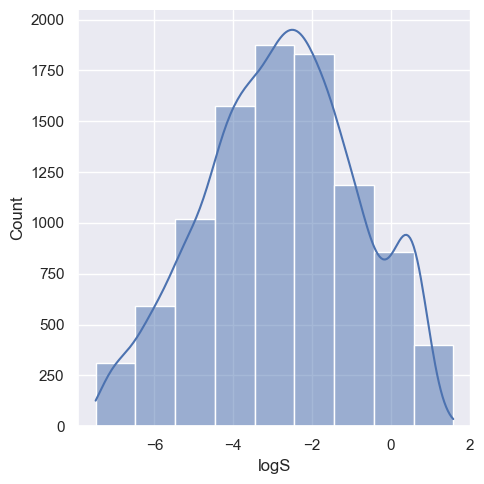

In [20]:
# Remove the outliers and filter the compounds that follow the normal distribution

data_N =data[data.logS.apply(lambda x:x> -7.5 and x< 1.7)]
sn.displot(data=data_N, x='logS', binwidth=1, kde=True)


<Axes: xlabel='logS'>

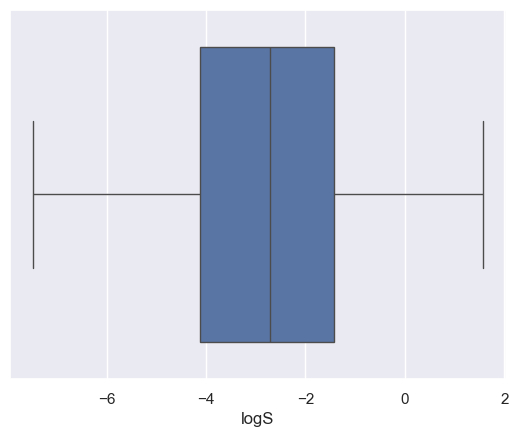

In [21]:
sn.boxplot(data=data_N, x='logS')

In [22]:
data_N.shape

(9648, 6)

In [23]:
data_N.head()

,Compound ID,InChIKey,SMILES,logS,logP,MW
294,C1951,NZFNXWQNBYZDAQ-UHFFFAOYSA-N,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1c(S2)cccc1.Cl,-7.49,6.69,407.04
295,C1952,CIMQMKORBAJNEC-UHFFFAOYSA-N,CC(=O)OCCN1CCN(CC1)CCCN1c2ccccc2Sc2c1cc(cc2)C(...,-7.49,6.42,552.48
296,C1953,MOPIFNSMNXBREW-UHFFFAOYSA-N,CCCCCCCNc1c2ccccc2nc2c1cccc2,-7.48,5.84,292.42
297,C1954,CKHJPWQVLKHBIH-ZDSKVHJSSA-N,O=CN(/C(=C(\SS/C(=C(\N(Cc1cnc(nc1N)C)C=O)/C)/C...,-7.47,7.12,702.89
298,C1955,NAPSCFZYZVSQHF-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCN(C)C,-7.46,6.81,297.56


In [24]:
# Remove the Duplicates Smiles or Structures

# generate canonical SMILES

def canonical_SMILES(smiles):
    canon_smi = [Chem.CanonSmiles(smi) for smi in smiles]
    return canon_smi

In [25]:
# Generate canonical Smiles
canon_smiles = canonical_SMILES(data_N.SMILES)

# Replace SMILES column wit Canonical SMILES
data_N["SMILES"] = canon_smiles

# Create a list for duplicate smiles
duplicate_smiles = data_N[data_N['SMILES'].duplicated()]['SMILES'].values
len(duplicate_smiles)

6

In [26]:
# Filter the duplicates smiles and sort them based on smiles

data_N[data_N['SMILES'].isin(duplicate_smiles)].sort_values(by=['SMILES'])

,Compound ID,InChIKey,SMILES,logS,logP,MW
5683,C1698,WUBBRNOQWQTFEX-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-2.44,1.00,222.25
5836,C943,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-2.36,1.00,222.25
7282,C7745,VWPOSFSPZNDTMJ-UCWKZMIHSA-N,CC(C)(C)NCC(O)COc1cccc2c1C[C@H](O)[C@H](O)C2,-1.57,1.03,309.40
8063,C1707,IWVCMVBTMGNXQD-PXOLEDIWSA-N,CC(C)(C)NCC(O)COc1cccc2c1C[C@H](O)[C@H](O)C2,-1.01,1.03,309.40
1345,C199,WKRLQDKEXYKHJB-HFTRVMKXSA-N,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc43)[C@@H]1CCC2=O,-5.28,3.74,268.35
1347,C1673,WKRLQDKEXYKHJB-HFTRVMKXSA-N,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc43)[C@@H]1CCC2=O,-5.28,3.74,268.35
5152,C1696,QZUDBNBUXVUHMW-UHFFFAOYSA-N,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,-2.70,3.10,253.28
5319,C843,JLKIGFTWXXRPMT-UHFFFAOYSA-N,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,-2.62,3.10,253.28
3918,C604,NXFQHRVNIOXGAQ-YCRREMRBSA-N,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1,-3.38,0.86,238.16
4159,C1690,NXFQHRVNIOXGAQ-OQFOIZHKSA-N,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1,-3.24,0.86,238.16


In [27]:
# Drop rows that contain duplicate SMILES and keep the first Structure
data_cleaned = data_N.drop_duplicates(subset=['SMILES'], keep='first')
len(data_cleaned)

9642

In [105]:
data_cleaned.head()

,Compound ID,InChIKey,SMILES,logS,logP,MW
294,C1951,NZFNXWQNBYZDAQ-UHFFFAOYSA-N,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2.Cl,-7.49,6.69,407.04
295,C1952,CIMQMKORBAJNEC-UHFFFAOYSA-N,CC(=O)OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc...,-7.49,6.42,552.48
296,C1953,MOPIFNSMNXBREW-UHFFFAOYSA-N,CCCCCCCNc1c2ccccc2nc2ccccc12,-7.48,5.84,292.42
297,C1954,CKHJPWQVLKHBIH-ZDSKVHJSSA-N,C/C(=C(\CCOC(=O)C(C)C)SS/C(CCOC(=O)C(C)C)=C(/C...,-7.47,7.12,702.89
298,C1955,NAPSCFZYZVSQHF-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCN(C)C,-7.46,6.81,297.56


In [106]:
data_cleaned.to_csv("data_cleaned.csv")

In [29]:
data_cleaned.shape

(9642, 6)

In [32]:
#Filter training data that does not contain test data
#Test Set data contains 100 Drug-like Compounds:- determined in one lab using accurate solubility experiment

Sol_Cpds = pd.read_csv("Drug_Like_Solubility _100.csv")

In [33]:
Sol_Cpds.shape

(100, 3)

In [34]:
Sol_Cpds.head()

,Chemical name,SMILES,LogS exp (mol/L)
0,Acetanilide,O=C(Nc1ccccc1)C,-1.40
1,Adenosine,c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...,-1.73
2,Allopurinol,c1c2c([nH]n1)ncnc2O,-2.26
3,Trimethoprim,COc1cc(cc(c1OC)OC)Cc2cnc(nc2N)N,-2.95
4,Acetazolamide,O=S(=O)(c1nnc(s1)NC(=O)C)N,-2.44


In [35]:
Sol_Cpds=Sol_Cpds.rename(columns={'LogS exp (mol/L)': 'LogS'})

In [36]:
Sol_Cpds.head()


,Chemical name,SMILES,LogS
0,Acetanilide,O=C(Nc1ccccc1)C,-1.40
1,Adenosine,c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...,-1.73
2,Allopurinol,c1c2c([nH]n1)ncnc2O,-2.26
3,Trimethoprim,COc1cc(cc(c1OC)OC)Cc2cnc(nc2N)N,-2.95
4,Acetazolamide,O=S(=O)(c1nnc(s1)NC(=O)C)N,-2.44


In [39]:
# Generate canonical Smiles in 100 Drug-like Compounds

canon_smiles = canonical_SMILES(Sol_Cpds.SMILES)

# Replace SMILES column wit Canonical SMILES
Sol_Cpds["SMILES"]= canon_smiles

# Create a list for duplicate smiles

duplicate_Sol_Cpds_Smiles = Sol_Cpds[Sol_Cpds['SMILES'].duplicated()]['SMILES'].values
len(duplicate_Sol_Cpds_Smiles)

0

In [40]:
# Molecules used in training and test of the model
Sol_Cpds_SMILES=Sol_Cpds.SMILES.values

# Filter molecules that are not present in the test set
# or exclude structures that are present in the test set from training set 

data_cleaned_final= data_cleaned[~data_cleaned['SMILES'].isin(Sol_Cpds_SMILES)]
print(f'Compounds present in training set:{len(data_cleaned) - len(data_cleaned_final)}')

Compounds present in training set:93


In [42]:
data_cleaned_final.shape

(9549, 6)

In [44]:
# The test set compounds should within the training data distribution
Sol_Cpds=Sol_Cpds[Sol_Cpds['LogS'].apply(lambda x:x> -7.5 and x< 1.7)]
Sol_Cpds

,Chemical name,SMILES,LogS
0,Acetanilide,CC(=O)Nc1ccccc1,-1.40
1,Adenosine,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,-1.73
2,Allopurinol,Oc1ncnc2[nH]ncc12,-2.26
3,Trimethoprim,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,-2.95
4,Acetazolamide,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-2.44
...,...,...,...
95,Sulfanilamide,Nc1ccc(S(N)(=O)=O)cc1,-1.36
96,Gliclazide,Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CCCC3C2)cc1,-4.29
97,Trihexyphenidyl,OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1,-5.20
98,Triphenylene,c1ccc2c(c1)c1ccccc1c1ccccc21,-6.73


In [ ]:
#Calculate RDkit Molecular Descriptors, which are molecular features

def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] 
                                    for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in tqdm(mols):
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(data_cleaned_final['SMILES'])

# Put the descriptors to dataframe
Dataset_with_210_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
Dataset_with_210_descriptors.head()

In [47]:
# This data will be used for training(90%) and validation set(10%)
Dataset_with_210_descriptors.shape

(9549, 210)

In [8]:
#Split the Compounds for Training and Validation set
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(Dataset_with_210_descriptors,
                                                      data_cleaned_final.logS,
                                                      test_size=0.1,random_state=42)

NameError: name 'Dataset_with_210_descriptors' is not defined

In [69]:
X_train.shape

(8594, 210)

In [72]:
y_train.shape

(8594,)

In [73]:
X_valid.shape

(955, 210)

In [1]:
y_valid

NameError: name 'y_valid' is not defined

In [76]:
data_cleaned.shape

(9642, 6)

In [84]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [85]:
#Select Machine Learning Models
lregs = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,random_state=42)
models, prediction_tests = lregs.fit(X_train_scaled, X_valid_scaled, y_train, y_valid)

 98%|█████████████████████████████████████████▉ | 41/42 [02:47<00:03,  3.38s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20818
[LightGBM] [Info] Number of data points in the train set: 8594, number of used features: 188
[LightGBM] [Info] Start training from score -2.762630


100%|███████████████████████████████████████████| 42/42 [02:48<00:00,  4.00s/it]


In [88]:
#The top three models
prediction_tests[:5]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.81,0.86,0.74,1.95
LGBMRegressor,0.81,0.85,0.74,0.80
ExtraTreesRegressor,0.80,0.85,0.76,19.63
SVR,0.79,0.84,0.79,5.51
RandomForestRegressor,0.79,0.84,0.79,52.31


In [89]:
#--- The best parameters are:  {'learning_rate': 0.04, 'max_depth': 26, 'n_estimators': 1150} --
model = LGBMRegressor(n_estimators=1150, max_depth= 26, learning_rate= 0.04, random_state=42)
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_valid_scaled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20899
[LightGBM] [Info] Number of data points in the train set: 8594, number of used features: 195
[LightGBM] [Info] Start training from score -2.762630


In [90]:
# A plotting function
def plot_data(actual, predicted, title):
     # model performance using RMSE
    rmse = np.sqrt(mean_squared_error(actual, predicted))  

    # R^2 (coefficient of determination) : 
    R2 =r2_score(actual, predicted)
    plt.figure(figsize=(8,6))

    # Plot the figure 
    sn.regplot(x=predicted , y=actual,line_kws={"lw":2,'ls':'--','color':'red',"alpha":0.7})
    plt.title(title, color='red')
    plt.xlabel('Predicted logS(mol/L)', color='blue')
    plt.ylabel('Experimental logS(mol/L)', color ='blue')
    plt.xlim(-8,1)
    
    plt.grid(alpha=0.3)
    R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
    rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
    plt.legend(handles=[R2, rmse])

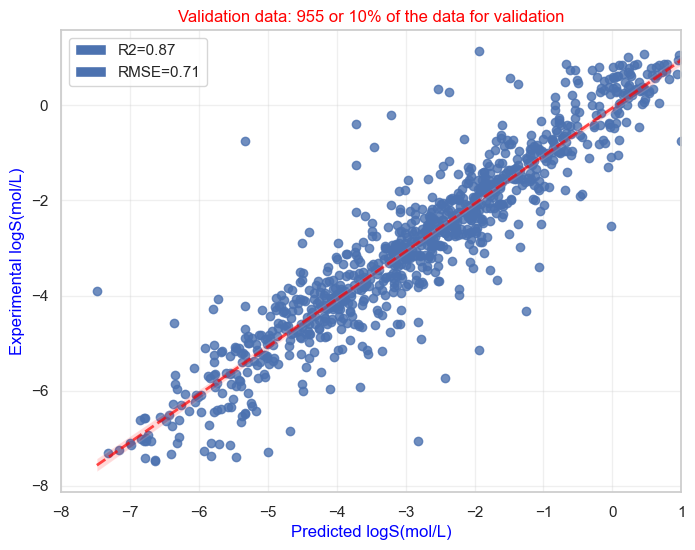

In [91]:
# Function call for plotting validation set
sn.set_theme(style="whitegrid")
plot_data(y_valid,y_preds,'Validation data: 955 or 10% of the data for validation')

In [95]:
#Calculate molecular descriptors for the test data or 98 compounds
Mol_descriptors_test,desc_names_test = RDkit_descriptors(Sol_Cpds['SMILES'])
Sol_Cpds_with_210_descriptors = pd.DataFrame(Mol_descriptors_test,columns=desc_names_test)

  0%|                                                    | 0/98 [00:00<?, ?it/s][16:46:41] DEPRECATION WARNING: please use MorganGenerator
[16:46:41] DEPRECATION WARNING: please use MorganGenerator
[16:46:41] DEPRECATION WARNING: please use MorganGenerator
[16:46:41] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/miniforge3/conda-bld/rdkit_1721395896353/work/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[16:46:41] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/miniforge3/conda-bld/rdkit_1721395896353/work/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[16:46:41] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/miniforg

In [97]:
Sol_Cpds_with_210_descriptors.shape

(98, 210)

In [98]:
# Standard scaler - transform
X_scaled_test = scaler.transform(Sol_Cpds_with_210_descriptors)

In [99]:
# Predict solubility of the test data
y_test_preds = model.predict(X_scaled_test)

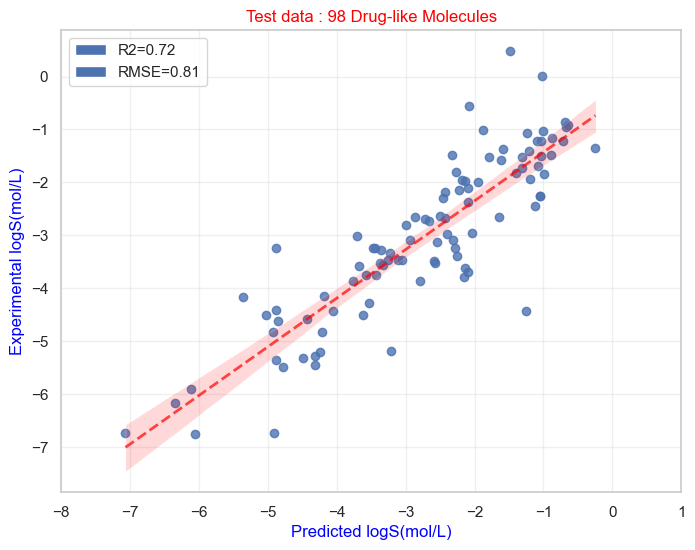

In [102]:
# function call for plotting testing set
sn.set_theme(style="whitegrid")
plot_data(Sol_Cpds['LogS'], y_test_preds, 
           'Test data : 98 Drug-like Molecules')